# Machine Learning in Python - Project 2

Due Friday, April 12th by 4 pm.

*Include contributors names in notebook metadata or here*

## Setup

*Install any packages here and load data*

In [48]:
# Add any additional libraries or submodules below

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn

In [12]:
# Load data in easyshare.csv
d = pd.read_csv("freddiemac.csv")
d.head()

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,zipcode,id_loan,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,prepaid,default
0,709.0,201703,9,204702,NaN,12,1,P,84,26,...,51300,F117Q1000376,N,360,2,Other sellers,Other servicers,NaN,0,1
1,649.0,201703,9,203202,33124.0,0,1,P,52,22,...,33100,F117Q1000418,C,180,2,Other sellers,Other servicers,NaN,1,0
2,747.0,201703,9,203702,41180.0,0,1,I,43,20,...,63100,F117Q1000479,N,240,2,Other sellers,Other servicers,NaN,1,0
3,711.0,201703,9,204702,20260.0,0,1,I,80,21,...,55800,F117Q1000523,P,360,2,Other sellers,Other servicers,NaN,1,0
4,751.0,201703,N,204702,NaN,35,1,P,95,24,...,75900,F117Q1000719,P,360,1,Other sellers,ARVESTCENTRALMTGECO,NaN,1,0


## Data Exploration

In [14]:
# Describe the data
d.describe()

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,int_rt,zipcode,orig_loan_term,cnt_borr,prepaid,default
count,6103.000000,6104.000000,6104.000000,5510.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000
mean,744.762740,201735.558650,204456.275885,30746.564428,5.027031,1.030799,72.502785,35.964613,244066.186107,72.046527,4.386463,61015.612713,327.018676,1.482634,0.981488,0.018512
std,48.208044,44.837849,573.354730,11158.605589,10.526750,0.246957,20.808191,15.583786,131445.871930,20.809927,0.508065,29401.664859,68.374234,0.499739,0.134806,0.134806
min,549.000000,201702.000000,202504.000000,10180.000000,0.000000,1.000000,7.000000,3.000000,22000.000000,7.000000,2.625000,800.000000,96.000000,1.000000,0.000000,0.000000
25%,708.000000,201705.000000,204702.000000,19740.000000,0.000000,1.000000,65.000000,29.000000,143000.000000,64.000000,4.125000,33900.000000,360.000000,1.000000,1.000000,0.000000
50%,753.000000,201709.000000,204706.000000,33340.000000,0.000000,1.000000,77.000000,38.000000,218000.000000,75.000000,4.375000,65000.000000,360.000000,1.000000,1.000000,0.000000
75%,786.000000,201802.000000,204711.000000,40140.000000,0.000000,1.000000,80.000000,43.000000,328000.000000,80.000000,4.750000,89800.000000,360.000000,2.000000,1.000000,0.000000
max,832.000000,201901.000000,204812.000000,49740.000000,35.000000,4.000000,999.000000,999.000000,795000.000000,999.000000,6.125000,99900.000000,360.000000,2.000000,1.000000,1.000000


In [15]:
# data info
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fico            6103 non-null   float64
 1   dt_first_pi     6104 non-null   int64  
 2   flag_fthb       6104 non-null   object 
 3   dt_matr         6104 non-null   int64  
 4   cd_msa          5510 non-null   float64
 5   mi_pct          6104 non-null   int64  
 6   cnt_units       6104 non-null   int64  
 7   occpy_sts       6104 non-null   object 
 8   cltv            6104 non-null   int64  
 9   dti             6104 non-null   int64  
 10  orig_upb        6104 non-null   int64  
 11  ltv             6104 non-null   int64  
 12  int_rt          6104 non-null   float64
 13  channel         6104 non-null   object 
 14  ppmt_pnlty      6066 non-null   object 
 15  prod_type       6104 non-null   object 
 16  st              6104 non-null   object 
 17  prop_type       6104 non-null   o

In [16]:
# Calculate the proportion of default == 1
d['default'].mean()
# really imbalanced data

0.018512450851900394

In [17]:
# count the nunber of missing values
d.isnull().sum()

fico                 1
dt_first_pi          0
flag_fthb            0
dt_matr              0
cd_msa             594
mi_pct               0
cnt_units            0
occpy_sts            0
cltv                 0
dti                  0
orig_upb             0
ltv                  0
int_rt               0
channel              0
ppmt_pnlty          38
prod_type            0
st                   0
prop_type            0
zipcode              0
id_loan              0
loan_purpose         0
orig_loan_term       0
cnt_borr             0
seller_name          0
servicer_name        0
flag_sc           5751
prepaid              0
default              0
dtype: int64

In [35]:
#drop the missing value in 'fico'
d_new = d.dropna(subset=['fico'])
# fill the missing value in 'cd_msa' and 'flag_sc' with 9
d_new['cd_msa'] = d_new['cd_msa'].fillna(9)
d_new['flag_sc'] = d_new['flag_sc'].fillna(9)
d_new= d_new.drop('prepaid', axis=1)

In [21]:
# Convert 'cd_msa' and 'zipcode' columns to 'object' data type
d_new['cd_msa'] = d_new['cd_msa'].astype('object')
d_new['zipcode'] = d_new['zipcode'].astype('object')


In [22]:
# check the missing value again
d_new.isnull().sum()

fico               0
dt_first_pi        0
flag_fthb          0
dt_matr            0
cd_msa             0
mi_pct             0
cnt_units          0
occpy_sts          0
cltv               0
dti                0
orig_upb           0
ltv                0
int_rt             0
channel            0
ppmt_pnlty        38
prod_type          0
st                 0
prop_type          0
zipcode            0
id_loan            0
loan_purpose       0
orig_loan_term     0
cnt_borr           0
seller_name        0
servicer_name      0
flag_sc            0
prepaid            0
default            0
dtype: int64

In [23]:
d_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6103 entries, 0 to 6103
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fico            6103 non-null   float64
 1   dt_first_pi     6103 non-null   int64  
 2   flag_fthb       6103 non-null   object 
 3   dt_matr         6103 non-null   int64  
 4   cd_msa          6103 non-null   object 
 5   mi_pct          6103 non-null   int64  
 6   cnt_units       6103 non-null   int64  
 7   occpy_sts       6103 non-null   object 
 8   cltv            6103 non-null   int64  
 9   dti             6103 non-null   int64  
 10  orig_upb        6103 non-null   int64  
 11  ltv             6103 non-null   int64  
 12  int_rt          6103 non-null   float64
 13  channel         6103 non-null   object 
 14  ppmt_pnlty      6065 non-null   object 
 15  prod_type       6103 non-null   object 
 16  st              6103 non-null   object 
 17  prop_type       6103 non-null   object

## Baseline Model

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Split the data into features (X) and target (y)
X = d_new.drop({'default'}, axis=1)  # Features
y = d_new['default']  # Target
# Convert any categorical variables to dummy variables if needed
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = dt_classifier.predict(X_test)


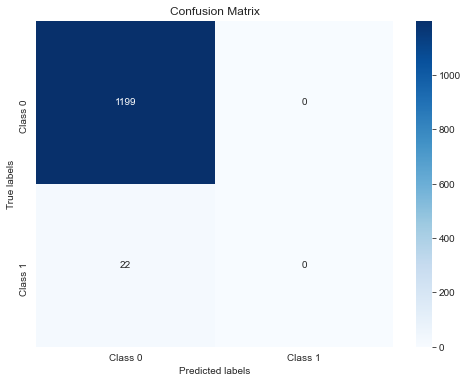

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are the true labels and predicted labels, respectively
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels (if applicable)
class_labels = ['Class 0', 'Class 1']  # Replace with your actual class labels if available

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [33]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are the true labels and predicted labels, respectively
# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1199
           1       0.00      0.00      0.00        22

    accuracy                           0.98      1221
   macro avg       0.49      0.50      0.50      1221
weighted avg       0.96      0.98      0.97      1221


## Imbalanced Data & Baseline model after SMOTE

In [49]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are your training features and labels, respectively
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


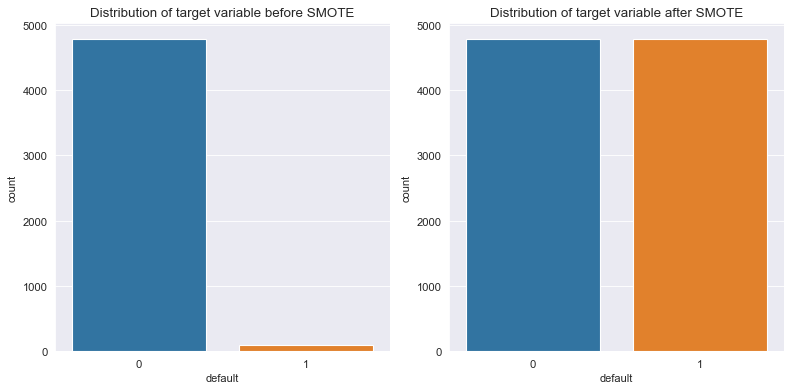

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable before SMOTE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(y_train)
plt.title('Distribution of target variable before SMOTE')

# Plot the distribution of the target variable after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(y_train_smote)
plt.title('Distribution of target variable after SMOTE')

plt.tight_layout()
plt.show()


In [38]:
# Initialize the decision tree classifier
dt_classifier_smote = DecisionTreeClassifier(random_state=42)

# Train the classifier on the resampled data
dt_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict on the testing data
y_pred_smote = dt_classifier_smote.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1190
           1       0.18      0.13      0.15        31

    accuracy                           0.96      1221
   macro avg       0.58      0.56      0.57      1221
weighted avg       0.96      0.96      0.96      1221


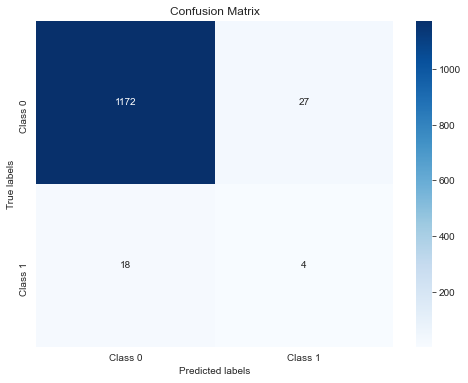

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Generate the classification report
report_smote = classification_report(y_pred_smote, y_test)

# Print the classification report
print("Classification Report:")
print(report_smote)
# Assuming y_test and y_pred are the true labels and predicted labels, respectively
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_smote)

# Define class labels (if applicable)
class_labels = ['Class 0', 'Class 1']  # Replace with your actual class labels if available

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## neural network -换object

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the testing data
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

## Catboost

In [51]:
from catboost import CatBoostClassifier

# Initialize the CatBoost classifier
catboost_classifier_smote = CatBoostClassifier(random_state=42)

# Train the classifier on the resampled data
catboost_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict on the testing data
y_pred_smote_cat = catboost_classifier_smote.predict(X_test)


Learning rate set to 0.027043
0:	learn: 0.6633162	total: 75.8ms	remaining: 1m 15s
1:	learn: 0.6380154	total: 91ms	remaining: 45.4s
2:	learn: 0.6048020	total: 113ms	remaining: 37.6s
3:	learn: 0.5746519	total: 125ms	remaining: 31s
4:	learn: 0.5518470	total: 135ms	remaining: 26.9s
5:	learn: 0.5268473	total: 155ms	remaining: 25.7s
6:	learn: 0.5093297	total: 169ms	remaining: 23.9s
7:	learn: 0.4880872	total: 181ms	remaining: 22.5s
8:	learn: 0.4720936	total: 193ms	remaining: 21.2s
9:	learn: 0.4522093	total: 214ms	remaining: 21.2s
10:	learn: 0.4338651	total: 229ms	remaining: 20.6s
11:	learn: 0.4149457	total: 254ms	remaining: 20.9s
12:	learn: 0.4032815	total: 272ms	remaining: 20.7s
13:	learn: 0.3880945	total: 286ms	remaining: 20.1s
14:	learn: 0.3757927	total: 308ms	remaining: 20.2s
15:	learn: 0.3663225	total: 321ms	remaining: 19.7s
16:	learn: 0.3478514	total: 333ms	remaining: 19.3s
17:	learn: 0.3364193	total: 347ms	remaining: 18.9s
18:	learn: 0.3288024	total: 362ms	remaining: 18.7s
19:	learn: 0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1219
           1       0.05      0.50      0.08         2

    accuracy                           0.98      1221
   macro avg       0.52      0.74      0.54      1221
weighted avg       1.00      0.98      0.99      1221


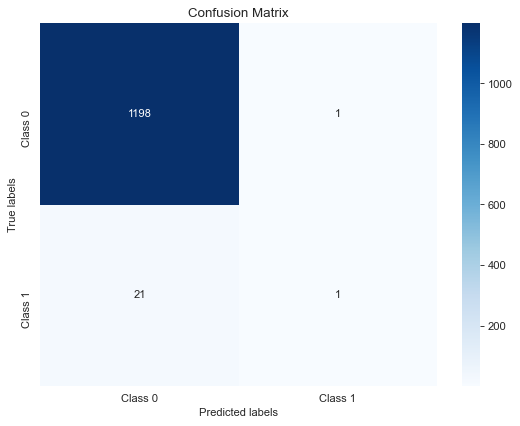

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Generate the classification report
report_smote_cat = classification_report(y_pred_smote_cat, y_test)

# Print the classification report
print("Classification Report:")
print(report_smote_cat)
# Assuming y_test and y_pred are the true labels and predicted labels, respectively
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_smote_cat)

# Define class labels (if applicable)
class_labels = ['Class 0', 'Class 1']  # Replace with your actual class labels if available

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a professional body (e.g. FreddiMac company or similar company). If you use any additional data sources, you should introduce them here and discuss why they were included.*

*Briefly outline the approaches being used and the conclusions that you are able to draw.*

# Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.*

*You should also split your data into training and testing sets, ideally before you look to much into the features and relationships with the target*

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data. Specifically, this should be any code that you use to generate new columns in the data frame `d`. Feature engineering that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

*If you decide to extract additional features from the full data (easyshare_all.csv), describe these variables here.*

*All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.*

# Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. linear regression, interaction terms, lasso, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validating it.*

*For example if you considered a linear regression model, a polynomial regression, and a lasso model and ultimately settled on the linear regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the linear regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

*Finally, you should also provide comparison of your model with baseline model(s) on the test data but only briefly describe the baseline model(s) considered*

# Discussion & Conclusions

*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of a government official or charity directy, who is understands the pressing challenges associated with ageining and dementia but may only have university level mathematics (not necessarily postgraduate statistics or machine learning). Your goal should be to highlight to this audience how your model can useful. You should also mention potential limitations of your model.*

*Finally, you should include recommendations on potential lifestyle changes or governmental/societal interventions to reduce dementia risk.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*

# References

*Include references if any*

In [ ]:
# Run the following to render to PDF
!jupyter nbconvert --to pdf project2.ipynb

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2a9ec8d-a343-4210-b36b-f9db26268fc5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>